In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Applying the Definition ##

Now that we have a few ways to think about expectation, let's see why it has such fundamental importance. We will start by directly applying the definition to calculate some expectations. In subsequent sections we will develop more powerful methods to calculate and use expectation.

### Constant ###
This little example is worth writing out because it gets used all the time. Suppose a random variable $X$ is actually a constant $c$, that is, suppose $P(X = c) = 1$. Then the distribution of $X$ puts all its mass on the single value $c$, and $E(X) = c\cdot 1 = c$. We just write $E(c) = c$. 

### Bernoulli and Indicators ###
If $X$ has the Bernoulli $(p)$ distribution, then $P(X = 1) = p$
and $P(X = 0) = 1-p$. So

$$
E(X) = 0 \cdot (1-p) ~ + ~ 1 \cdot p ~ = ~ p
$$

As you saw earlier, zero/one valued random variables are building blocks for other variables and are called indicators.

Let $A$ be any event. Then the indicator of $A$ is the random variable $I_A$ that is 1 if $A$ occurs and 0 if $A$ doesn't occur. Thus $I_A$ is has the Bernoulli $(P(A))$ distribution and 

$$
E(I_A) = P(A)
$$

by our calculation above. Thus every probability is an expectation. We will use this heavily in later sections.

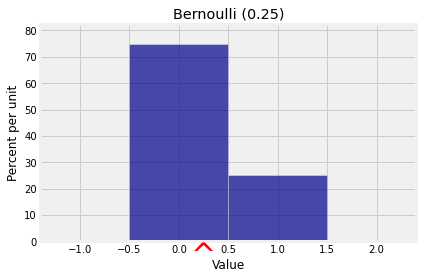

In [2]:
x = [0, 1]
qp = [0.75, 0.25]
bern_1_3 = Table().values(x).probabilities(qp)
Plot(bern_1_3, show_ev=True)
plt.title('Bernoulli (0.25)');

```{admonition} Quick Check
Three coins are tossed. Let $I$ be the indicator of the event that all three coins land the same way. Find $E(I)$.

```

```{admonition} Answer
:class: dropdown
$\frac{1}{4}$

```

### Uniform on an Interval of Integers ###
Let $a$ and $b$ be two integers such that $a < b$. If $X$ has the uniform distribution on the integers $a, a+1, a+2, \ldots, b$, then by symmetry, $E(X)$ is half-way between $a$ and $b$. That's where the probability histogram will balance. So

$$
E(X) = \frac{a+b}{2}
$$

For example, if $X$ has the uniform distribution on $1, 2, \ldots , n$, then

$$
E(X) = \frac{n+1}{2}
$$

An instance of this is if $X$ is the number of spots on one roll of a die. Then $E(X) = 3.5$.

If instead $X$ is uniform on $0, 1, 2, \ldots , n$, then

$$
E(X) = \frac{n}{2}
$$

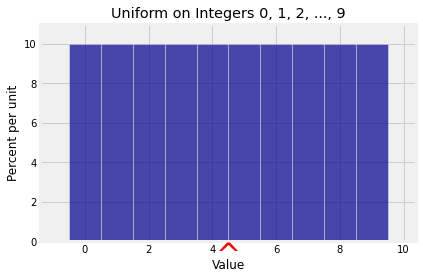

In [3]:
x = np.arange(10)
probs = 0.1*np.ones(10)
unif_10 = Table().values(x).probabilities(probs)
Plot(unif_10, show_ev=True)
plt.title('Uniform on Integers 0, 1, 2, ..., 9');

```{admonition} Quick Check
Let $D$ be a digit picked at random from the $10$ digits $0$ through $9$. Pick one option: $E(D)$ is equal to

(i) $4$

(ii) $4.5$

(iii) $5$

```

```{admonition} Answer
:class: dropdown
(ii)

```

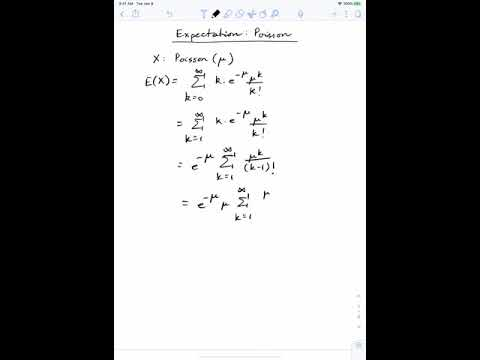

In [4]:
# VIDEO: Expectation: Poisson
from IPython.display import YouTubeVideo

YouTubeVideo('hq9GiEQ1ZzY')

### Poisson ###
Let $X$ have the Poisson $(\mu)$ distribution. Then

$$
\begin{align*}
E(X) &= \sum_{k=0}^\infty k e^{-\mu} \frac{\mu^k}{k!} \\ \\
&= e^{-\mu} \mu \sum_{k=1}^\infty \frac{\mu^{k-1}}{(k-1)!} \\ \\
&= e^{-\mu} \mu \sum_{j=0}^\infty \frac{\mu^j}{j!} \\ \\
&= e^{-\mu} \mu e^{\mu} \\ \\
&= \mu
\end{align*}
$$

**We now have an important new interpretation of the parameter of the Poisson distribution.** We saw earlier it was close to the mode; now we know that it is also the balance point or expectation of the distribution. The notation $\mu$ was chosen to stand for "mean".

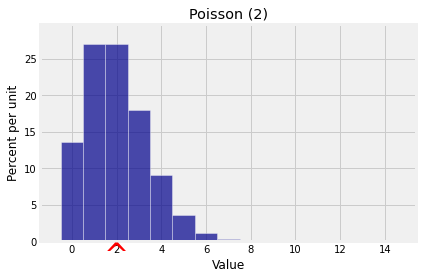

In [5]:
k = np.arange(15)
poi_2_probs = stats.poisson.pmf(k, 2)
dist_poi_2 = Table().values(k).probabilities(poi_2_probs)
Plot(dist_poi_2, show_ev=True)
plt.title('Poisson (2)');

```{admonition} Quick Check
Let $X$ have the Poisson $(\mu)$ distribution. Say whether each of the following statements is True or False.

(a) If you simulate $X$ repeatedly, the average of the simulated values is likely to be around $\mu$.

(b) The most likely value of $X$ is close to $\mu$.

(c) $P(X > \mu)$ is $0.5$ or close to $0.5$.

```

```{admonition} Answer
:class: dropdown
(a) True

(b) True

(c) False

```

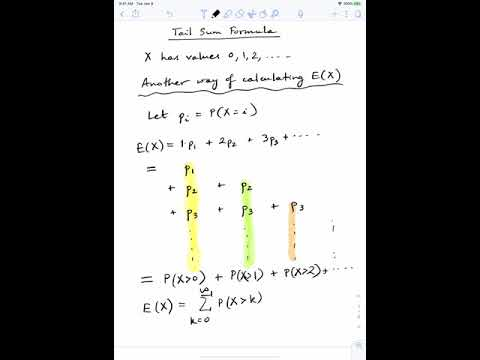

In [6]:
# VIDEO: Tail Sum Formula
YouTubeVideo('ctcoolPNZjE')

### Tail Sum Formula ###

To find the expectation of a non-negative integer valued random variable it is sometimes quicker to use a formula that uses only the *right hand tail* probabilities $P(X > k) = 1 - F(k)$ where $F$ is the cdf of $X$ and $k \ge 0$.

For non-negative integer valued $X$,

$$
E(X) = P(X=1) + 2P(X=2) + 3P(X=3) + \cdots
$$

Rewrite this as

$$
\begin{align*}
E(X) ~ = ~ &P(X=1)\\
+ ~ &P(X=2) + P(X=2)\\
+ ~ &P(X=3) + P(X=3) + P(X=3)\\
+ ~ &P(X=4) + P(X=4) + P(X=4) + P(X=4)\\
+ ~ & ~~~~~~~~ \vdots ~~~~~ + ~~~~~~~~ \vdots ~~~~~ + ~~~~~~~~ \vdots ~~~~~ + ~~~~~~~~ \vdots ~~~~~~
\end{align*}
$$

Add the terms along each column on the right hand side to get the *tail sum formula* for the expectation of a non-negative integer valued random variable.

$$
E(X) = P(X > 0) + P(X > 1) + P(X > 2) + \cdots ~ = ~ \sum_{k=0}^\infty P(X > k)
$$

This formula comes in handy if a random variable has tail probabilities that are easy to find and also easy to sum.

### Geometric ###
In a sequence of i.i.d. Bernoulli $(p)$ trials, let $X$ be the number of trials till the first success. We will use the word "till" to mean "up to and including".

Let $q = 1-p$. The distribution of $X$ is given by

$$
P(X = k) ~ = ~ P(k-1 \text{ failures followed by a success}) ~ = ~ q^{k-1}p, ~~ k = 1, 2, 3, \ldots
$$

This is called the *geometric* $(p)$ distribution on $\{1, 2, 3, \ldots \}$ because the probabilities are terms in a geometric series.

The right tails of $X$ are simple because for each $k \ge 1$,

$$
P(X > k) ~ = ~ P(\text{first } k \text{ trials are failures}) ~ = ~ q^k
$$

The formula is also true for $k = 0$ because $P(X > 0) = 1 = q^0$.

By the tail sum formula, 

$$
E(X) ~ = ~ \sum_{k=0}^\infty q^k ~ = ~ \frac{1}{1-q} ~ = ~ \frac{1}{p}
$$

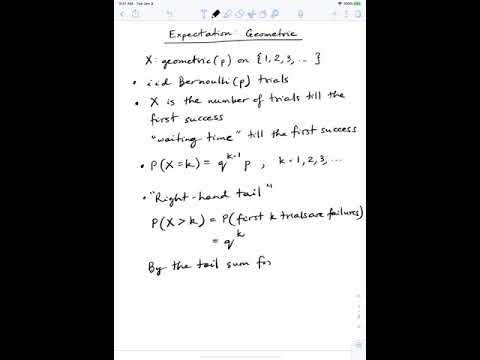

In [7]:
# VIDEO: Expectation: Geometric
YouTubeVideo('f2HhYnaGL2U')

```{admonition} Quick Check
Find the expectations of the following random variables.

(a) The number of rolls of a die till the face with six spots appears

(b) The number of rolls of a die till a face with more than four spots appears

(c) The number of times a coin is tossed till it lands heads

```

```{admonition} Answer
:class: dropdown
(a) 6

(b) 3

(c) 2

```